In [8]:
import numpy as np
import matplotlib.pyplot as plt

L = 10
Numx = 1024
x = np.linspace(-L, L, Numx)
dx = x[1] - x[0]

Tmax = 20.0
dt = 0.001
Numt = int(Tmax / dt)
interv = 100

data_rho = np.zeros((Numx, Numt // interv + 1))
data_t = np.zeros(Numt // interv + 1)
print(data_rho.shape)

(1024, 201)


In [19]:
k = np.fft.fftfreq(Numx, dx) * 2 * np.pi
V = 0.5 * x ** 2

psi0 = 1 / np.sqrt(2 * np.pi) * np.exp(- x ** 2 / 2)
psi0 = psi0.astype('complex128')

In [26]:
idx = 0; psi = psi0
data_rho[:, 0] = np.abs(psi) ** 2
data_t[0] = 0.0
for i in range(Numt):
    psi *= np.exp(-1j * (V + 0.5 * np.abs(psi) ** 2) / 2 * dt)
    # psi *= np.exp(-1j * (V + 0.5 * np.abs(psi ** 2)) / 2 * dt)

    psi_k = np.fft.fft(psi)
    psi_k *= np.exp(-1j * 0.5 * k ** 2 * dt)
    psi = np.fft.ifft(psi_k)


    if i % interv == 0:
        idx += 1
        data_rho[:, idx] = np.abs(psi) ** 2
        data_t[idx] = i * dt
        print(f"{idx}: time = {i * dt:.3f} saved", end='\r')

(1024, 201)
(1024, 201) (1024, 201)


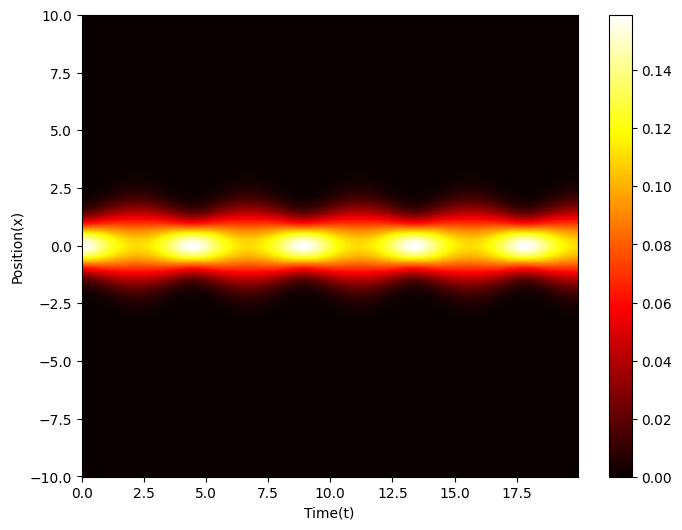

In [27]:
print(data_rho.shape)
plt.figure(figsize=(8, 6))
rho, t = np.meshgrid(data_t, x)  # Ensure correct shape
print(rho.shape, t.shape)
plt.pcolormesh(rho, t, data_rho, shading="auto", cmap='hot')
plt.colorbar()
plt.xlabel("Time(t)")
plt.ylabel("Position(x)")
plt.show()

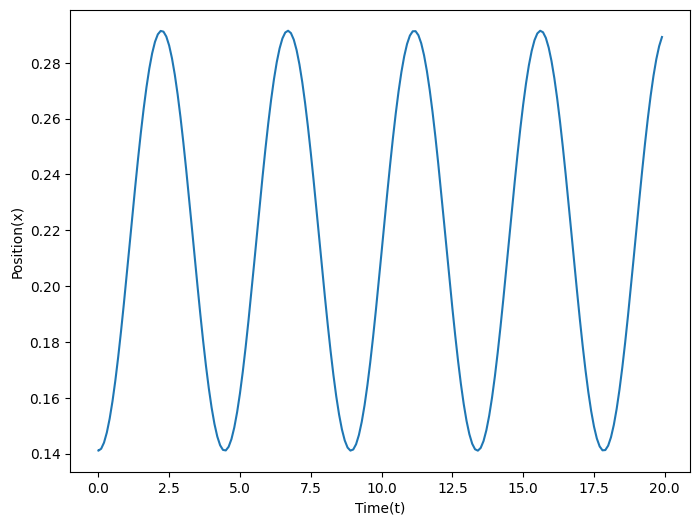

In [31]:
data_x2 = np.sum(data_rho * (x ** 2)[:, np.newaxis], axis=0) * dx
fig = plt.figure(figsize=(8, 6))
plt.plot(data_t, data_x2)
plt.xlabel("Time(t)")
plt.ylabel("Position(x)")
plt.show()